# Project 2 - Ames Housing Project for Zillow

## Problem Statement
- Current house pricing metrics within Zillow are outdated. 
The predictions are made primarily on bed and bath and square footage. 
With the movement to a more micro style of living, we should be evaluating more on the overall quality instead of the overall quantity. 

## Executive Summary
### Contents
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Numerical Features](#Numerical-Features)
- [Categorical Features](#Categorical-Features)
- [Parameters](#Parameters)
- [Score](#Score)
- [Prediction](#Prediction)
- [Graphing](#Graphing)
- [Save to file](#Save-to-file)

## Data Import and Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [2]:
train_ames = pd.read_csv('/Users/kylesokolis/dsi/submissions/datasets/train.csv')
test_kaggle = pd.read_csv('/Users/kylesokolis/dsi/submissions/datasets/test.csv')


In [3]:
list(train_ames.columns)

['Id',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Are

In [4]:
train_ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
test_kaggle.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
# train_ames['Lot Area'].describe()

# train_ames['Lot Area'].head()

# pd.cut(train_ames['Lot Area'], bins=3)

# lot_cut = pd.cut(train_ames['Lot Area'], (1,
#                                           7500,
#                                           11500,
#                                           200000), labels=['Small', 
#                                                                         'Medium', 
#                                                                         'Large'])
# lot_cut = pd.DataFrame(lot_cut)
# lot_cut.isna().sum()

# lot_cut.describe()



# dummy_lot = pd.get_dummies(lot_cut)
# dummy_lot = pd.DataFrame(dummy_lot)

# train_ames = pd.concat([train_ames, dummy_lot], axis=1)

# train_ames.head()

# print(train_ames['Small'].value_counts())

# print(train_ames['Medium'].value_counts())

# print(train_ames['Large'].value_counts())

In [7]:
train_ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

## Numerical Features

In [8]:
num_features = list(train_ames._get_numeric_data().drop(['Id', 'PID', 'SalePrice'], axis=1))

In [9]:
features = num_features

In [10]:
for feature in num_features:
    train_ames[feature] = train_ames[feature].fillna(-666)
    test_kaggle[feature] = test_kaggle[feature].fillna(-666)

## Categorical Features

In [11]:
categorical_col = list(train_ames.select_dtypes(include=['object']).columns)

In [12]:
for col in categorical_col:
    train_ames[col] = train_ames[col].fillna('N/A')
    test_kaggle[col] = test_kaggle[col].fillna('N/A')

    train_ames_val = sorted(list(train_ames[col].unique()))
    test_kaggle_val = sorted(list(test_kaggle[col].unique()))

    categories = set(train_ames_val + test_kaggle_val)

    train_ames[col] = pd.Categorical(train_ames[col], categories=categories)
    test_kaggle[col] = pd.Categorical(test_kaggle[col], categories=categories)

In [13]:
train_ames_dum = pd.get_dummies(train_ames[categorical_col])
test_kaggle_dum = pd.get_dummies(test_kaggle[categorical_col])

In [14]:
X_train = pd.concat([train_ames_dum, train_ames[num_features]], axis=1)
X_test = pd.concat([test_kaggle_dum, test_kaggle[num_features]], axis=1)


## Parameters

In [15]:
parameters = {}

In [16]:
gs = GridSearchCV(
    RandomForestRegressor(),
    param_grid=parameters,
    n_jobs=20,
    cv = 5,
    verbose = 1,
    return_train_score = True
)

In [17]:
gs.fit(X_train, train_ames['SalePrice'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=20)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=20)]: Done   5 out of   5 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=20, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

## Score

In [18]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.8800784212271804
{}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


## Prediction

In [19]:
prediction = gs.predict(X_test)

In [20]:
test_kaggle['SalePrice'] = prediction

In [21]:
prediction.mean()

179540.79658703072

## Graphing

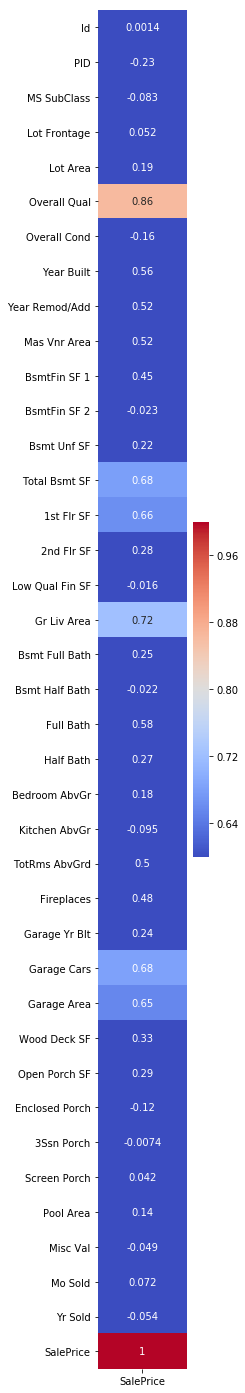

In [22]:
plt.figure(figsize=(2,25))

sns.heatmap((test_kaggle.corr()[['SalePrice']]), cmap='coolwarm', annot=True, vmin=.6)

In [23]:
year_built_sale_price = test_kaggle[['Year Built', 'SalePrice']]

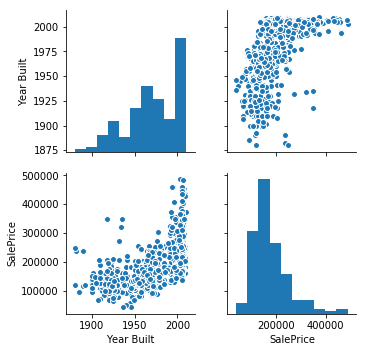

In [24]:
sns.pairplot(year_built_sale_price)

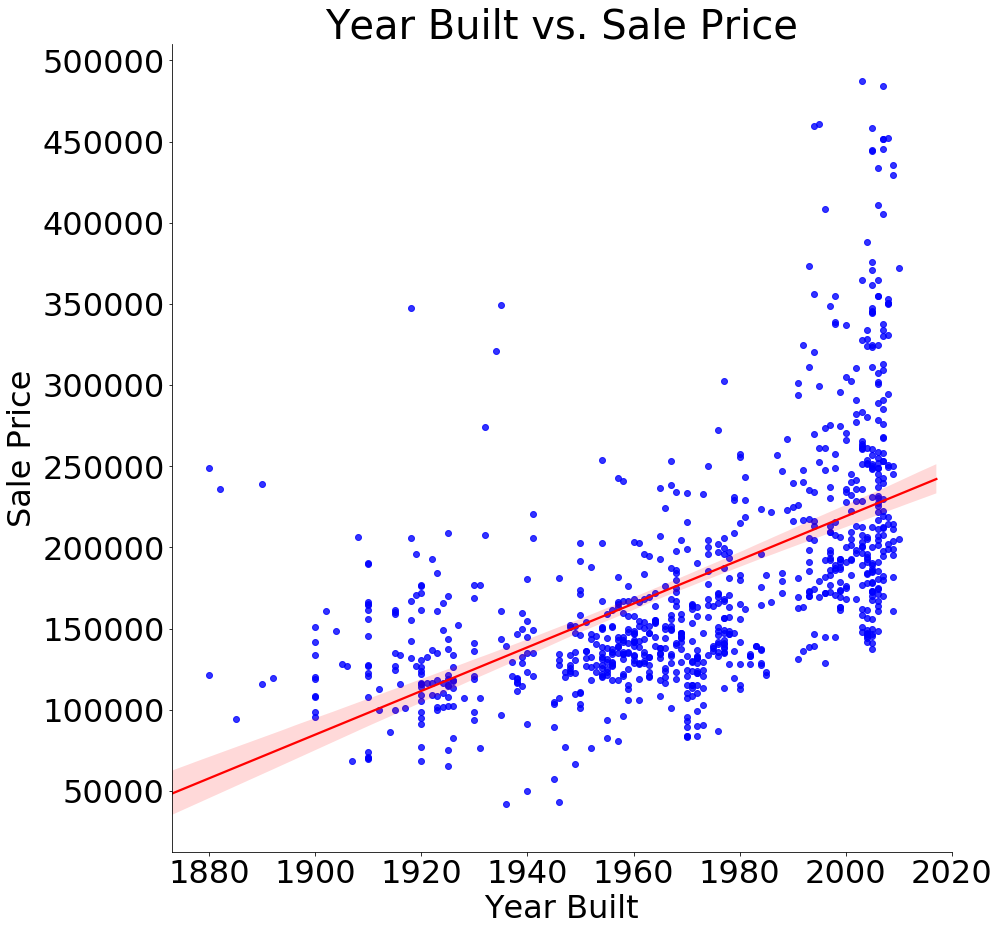

In [25]:
# Year Built vs. Sale Price 

sns.lmplot('Year Built', 'SalePrice', 
           data=test_kaggle, 
           line_kws={'color': 'red'}, 
           scatter_kws={'color': 'blue'},
           size=12
          )
plt.xlabel('Year Built', fontsize=32)
plt.xticks([1880, 
            1900, 
            1920, 
            1940, 
            1960, 
            1980, 
            2000, 
            2020], size=32
          )

plt.ylabel('Sale Price', fontsize=32)
plt.yticks([50000, 
            100000, 
            150000, 
            200000, 
            250000, 
            300000, 
            350000, 
            400000, 
            450000, 
            500000], size=32
          )
plt.title('Year Built vs. Sale Price', fontsize=40);

In [26]:
year_remod_sale_price = test_kaggle[['Year Remod/Add', 'SalePrice']]

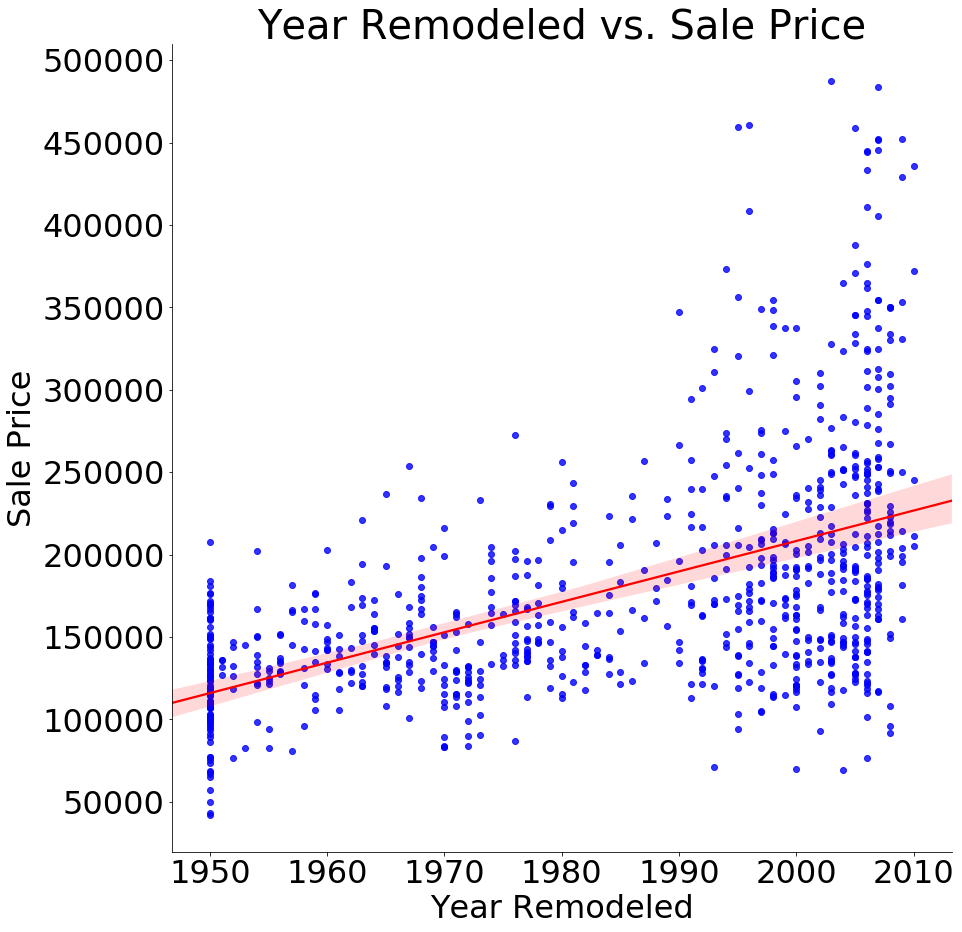

In [27]:
# Year Built vs. Sale Price 

sns.lmplot('Year Remod/Add', 'SalePrice', 
           data=test_kaggle, 
           line_kws={'color': 'red'}, 
           scatter_kws={'color': 'blue'},
           size=12,
           ci=100
          )
plt.xlabel('Year Remodeled', fontsize=32)
plt.xticks(size=32
          )

plt.ylabel('Sale Price', fontsize=32)
plt.yticks([50000, 
            100000, 
            150000, 
            200000, 
            250000, 
            300000, 
            350000, 
            400000, 
            450000, 
            500000], size=32
          )
plt.title('Year Remodeled vs. Sale Price', fontsize=40);

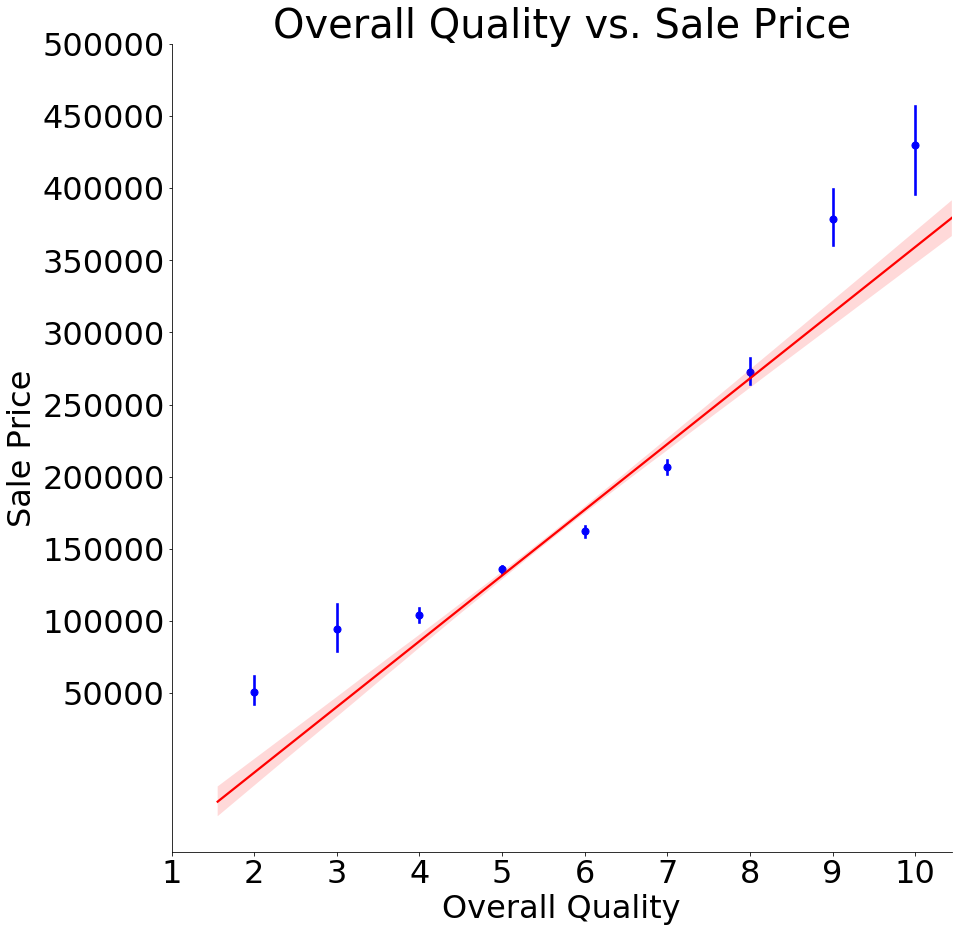

In [28]:
# Year Built vs. Sale Price 

sns.lmplot('Overall Qual', 'SalePrice', 
           data=test_kaggle, 
           line_kws={'color': 'red'}, 
           scatter_kws={'color': 'blue'},
           size=12,
           x_estimator=np.mean
          )
plt.xlabel('Overall Quality', fontsize=32)
plt.xticks([1, 
            2, 
            3, 
            4, 
            5, 
            6, 
            7, 
            8, 
            9, 
            10], size=32
          )

plt.ylabel('Sale Price', fontsize=32)
plt.yticks([50000, 
            100000, 
            150000, 
            200000, 
            250000, 
            300000, 
            350000, 
            400000, 
            450000, 
            500000], size=32
          )
plt.title('Overall Quality vs. Sale Price', fontsize=40);

In [29]:
test_kaggle['SalePrice'].mean()

179540.7965870308

In [30]:
test_kaggle['SalePrice'].describe()

count       879.000000
mean     179540.796587
std       72500.420380
min       41947.800000
25%      131750.000000
50%      161250.000000
75%      207232.500000
max      487600.000000
Name: SalePrice, dtype: float64

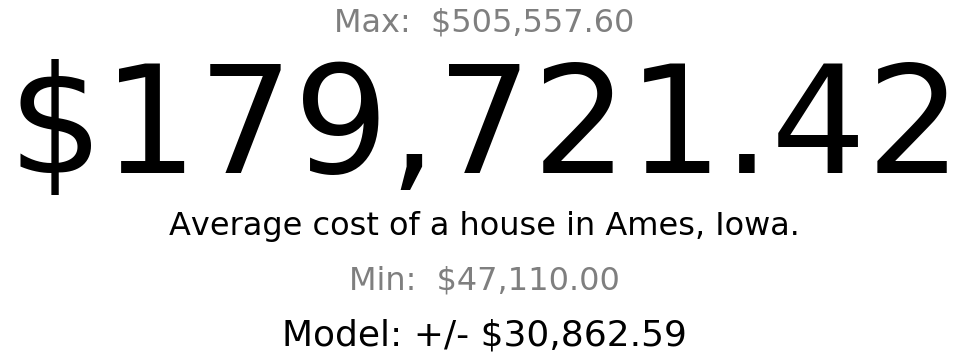

In [31]:
# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
# at (horizontal = 0.5, vertical = 0.6)
# stating the percent change (s means string)
# center-aligned
# font size 150
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.6,
         s = '$' + str('179,721.42'),
         ha = 'center',
         va = 'center',
         size = 150,
         alpha = 1)

# Create text:
# at (horizontal = 0.5, vertical = 0.25)
# stating "growth in Apple's stock price, compared to 100% increase in the Dow."
# with a line break in between "price" and "compared"
# center-aligned
# font size 32
# alpha = 0.5 --> 50% clear; 50% opaque
plt.text(x = 0.5,
         y = 0.25,
         s = str('Average cost of a house in Ames, Iowa.'),
         ha = 'center',
         va = 'center',
         size = 32,
         alpha = 1)
######
plt.text(x = 0.5,
         y = 0.05,
         s = str('Min:  ') + '$' + str('47,110.00'),
         ha = 'center',
         va = 'center',
         size = 32,
         alpha = 0.5)
######
plt.text(x = 0.5,
         y = 1.0,
         s = str('Max:  ') + '$' + str('505,557.60'),
         ha = 'center',
         va = 'center',
         size = 32,
         alpha = 0.5)
######
plt.text(x = 0.5,
         y = -0.15,
         s = str('Model: +/- ') + '$' + str('30,862.59'),
         ha = 'center',
         va = 'center',
         size = 36,
         alpha = 1.0)
# No axes.
plt.axis('off');

## Save to file

In [32]:
test_kaggle[['Id', 'SalePrice']]

,Id,SalePrice
0,2658,165155.0
1,2718,148870.5
2,2414,180722.5
3,1989,118345.0
4,625,169586.4
5,333,89875.0
6,1327,121980.9
7,858,156669.5
8,95,184453.5
9,1568,166950.0


In [34]:
test_kaggle[['Id', 
             'SalePrice']].to_csv(
    '/Users/kylesokolis/dsi/submissions/datasets/KSokolis_Kaggle_Sub_4', 
                                  index=False)